In [30]:
!pip install CoolProp
!pip install numpy
!pip install matplotlib


from CoolProp.CoolProp import PropsSI
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def COP_finder(T,T_low,T_high):
    fluid_low = 'CarbonDioxide'
    fluid_high = 'Ammonia'
    
    Tmiddle_K= T+273.15
    
    #state 1
    T1_K=T_low+273.15
    X1=1
    h1 = PropsSI('H','T',T1_K,'Q',X1,fluid_low)
    s1 = PropsSI('S','T',T1_K,'Q',X1,fluid_low)
    P1_Pa = PropsSI('P','T',T1_K,'Q',X1,fluid_low)
    
    #state 5
    T5_K=Tmiddle_K
    X5=1
    h5 = PropsSI('H','T',T5_K,'Q',X5,fluid_high)
    s5 = PropsSI('S','T',T5_K,'Q',X5,fluid_high)
    P5_Pa = PropsSI('P','T',T5_K,'Q',X5,fluid_high)
    
    #state 3
    T3_K=Tmiddle_K
    X3=0
    h3 = PropsSI('H','T',T3_K,'Q',X3,fluid_low)
    s3 = PropsSI('S','T',T3_K,'Q',X3,fluid_low)
    P3_Pa = PropsSI('P','T',T3_K,'Q',X3,fluid_low)
    
    #state 2
    s2=s1
    P2_Pa=P3_Pa
    h2=PropsSI('H','S',s2,'P',P2_Pa,fluid_low)
    T2_K=PropsSI('T','S',s2,'P',P2_Pa,fluid_low)
    
    #state 4
    P4_Pa=P1_Pa
    h4=h3
    s4 = PropsSI('S','H',h4,'P',P4_Pa,fluid_low)
    T4_K = PropsSI('T','H',h4,'P',P4_Pa,fluid_low)
    
    #state 7
    T7_K=T_high+273.15
    X7=1
    h7 = PropsSI('H','T',T7_K,'Q',X7,fluid_high)
    s7 = PropsSI('S','T',T7_K,'Q',X7,fluid_high)
    P7_Pa = PropsSI('P','T',T7_K,'Q',X7,fluid_high)
    
    #state 6
    s6=s5
    P6_Pa=P7_Pa
    h6=PropsSI('H','S',s6,'P',P6_Pa,fluid_high)
    T6_K=PropsSI('T','S',s6,'P',P6_Pa,fluid_high)
    
    #state 8
    P8_Pa=P5_Pa
    h8=h7
    s8 = PropsSI('S','H',h8,'P',P7_Pa,fluid_high)
    T8_K = PropsSI('T','H',h8,'P',P7_Pa,fluid_high)

    q_low=(h1-h4)
    q_high=(h7-h6)
    w_low=(h2-h1)
    w_high=(h6-h5)

    w_in=w_low+w_high
    COP=q_low/w_in
    return COP

The max COP of 2.22359 occurs when T=28.32202 C or T=301.47202 K 


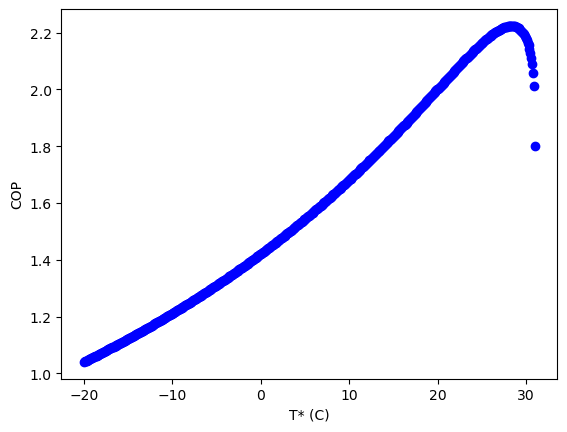

In [28]:
T_high_C = 30.9782
T_low_C = -20
T=np.linspace(T_low_C,T_high_C,num=500)

COP=[]

for i in T:
    COP1= COP_finder(i,T_low_C,T_high_C)
    COP.append(COP1)

plt.plot(T,COP,'bo')
plt.xlabel("T* (C)")
plt.ylabel("COP")

max_COP=max(COP)
max_COP_index=COP.index(max_COP)

T_max_COP=T[max_COP_index]

print(f'The max COP of {max_COP:.5f} occurs when T={T_max_COP :.5f} C or T={T_max_COP+273.15 :.5f} K ')
